In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
import glob

### Import and Merge Census Data

In [9]:
def merge_census_dfs(path: str) -> pd.DataFrame:
    """
    Merge multiple census dataframes into a single dataframe based on the given path.
    Args:
        path (str): The path where the census excel files are located.
    Returns:
        pd.DataFrame: The merged dataframe containing the selected features from all census files.
    """
    excel_files = glob.glob(f'{path}/*.xls')
    dfs = []
    for file in excel_files:
        suffix = file.split('\\')[-1].split('.')[0].split('_')[0].upper()
        print(suffix)
 
        df = pd.read_excel(file, decimal=',', na_values='X', engine='calamine')
        
        cols_to_keep = ['Cod_setor'] + [col for col in df.columns if col.startswith('V')]
        df = df[cols_to_keep]

        df = df.rename(columns={col: f'{col}_{suffix}' for col in df.columns if col != 'Cod_setor'})
        dfs.append(df)

    df_merged = dfs[0]
    for df in dfs[1:]:
        df_merged = df_merged.merge(df, on='Cod_setor', how='outer')

    return df_merged


In [20]:
census_path = '../CENSO-2010/SP/EXCEL/'
census = merge_census_dfs(census_path)
census.shape

ENTORNO01
ENTORNO02
DOMICILIORENDA
BASICO
DOMICILIO02
DOMICILIO01
PESSOA01
PESSOA02
ENTORNO04
ENTORNO05
ENTORNO03
PESSOA04
PESSOA06
PESSOA03
PESSOA05
PESSOA07
PESSOA08
PESSOA12
PESSOA11
PESSOA09
PESSOA10
PESSOARENDA
RESPONSAVEL01
RESPONSAVEL02
RESPONSAVELRENDA
PESSOA13


(18363, 4037)

In [21]:
census = census.rename(columns={'Cod_setor': 'CD_GEOCODI'})
census['CD_GEOCODI'] = census['CD_GEOCODI'].astype(str)

In [22]:
cols_to_keep = [
    'CD_GEOCODI', 'V001_ENTORNO01', 'V002_ENTORNO01', 'V003_ENTORNO01',
    'V004_ENTORNO01', 'V001_DOMICILIORENDA', 'V002_DOMICILIORENDA',
    'V003_DOMICILIORENDA', 'V004_DOMICILIORENDA', 'V001_BASICO',
    'V002_BASICO', 'V003_BASICO', 'V004_BASICO', 'V005_BASICO',
    'V006_BASICO', 'V007_BASICO', 'V008_BASICO', 'V009_BASICO',
    'V010_BASICO', 'V011_BASICO', 'V012_BASICO', 'V001_DOMICILIO02',
    'V002_DOMICILIO02', 'V001_DOMICILIO01', 'V002_DOMICILIO01',
    'V001_PESSOA01', 'V086_PESSOA02', 'V001_PESSOA03', 'V002_PESSOA03','V003_PESSOA03',
    'V004_PESSOA03', 'V005_PESSOA03', 'V006_PESSOA03', 'V001_PESSOA12',
    'V001_PESSOA11', 'V001_RESPONSAVEL01', 'V001_RESPONSAVEL02',
]

In [23]:
census = census[cols_to_keep]
census.shape

(18363, 37)

<Axes: >

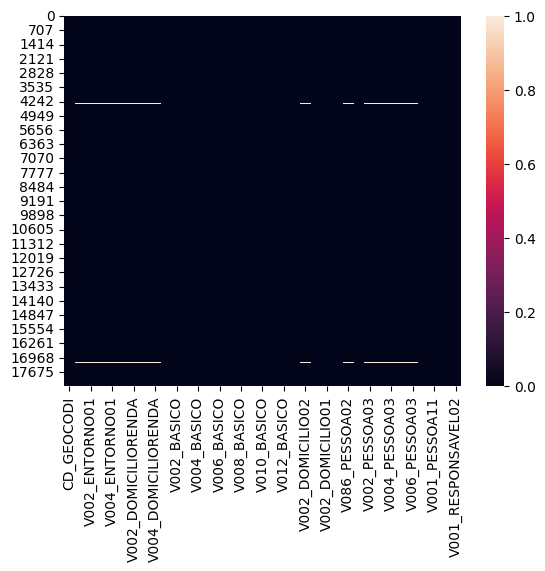

In [33]:
import seaborn as sns

sns.heatmap(census.isna())

In [ ]:
sns.heatmap?

### Save to File

In [25]:
census.to_csv('../GENERATED-DATA/census_by_tract.csv', index=False)